MinMaxScaler will scale down the features value in between 0 to 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wine_data.csv',header = None,usecols=[0,1,2])
df.columns = ['class label','Alcohol','Malic Acid']

In [5]:
df.sample(10)

,class label,Alcohol,Malic Acid
172,3,14.16,2.51
47,1,13.90,1.68
16,1,14.30,1.92
81,2,12.72,1.81
86,2,12.16,1.61
67,2,12.37,1.17
43,1,13.24,3.98
148,3,13.32,3.24
32,1,13.68,1.83
137,3,12.53,5.51


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

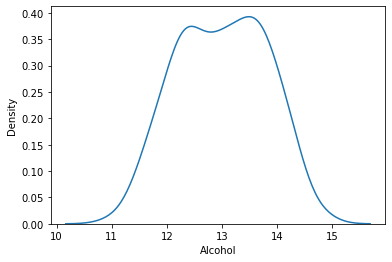

In [6]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot:xlabel='Malic Acid', ylabel='Density'>

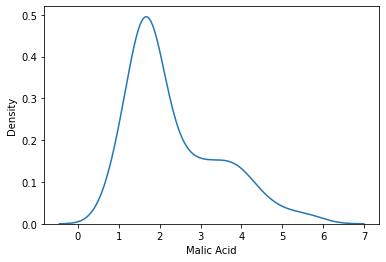

In [7]:
sns.kdeplot(df['Malic Acid'])

<AxesSubplot:xlabel='Alcohol', ylabel='Malic Acid'>

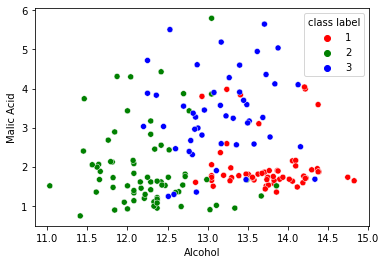

In [10]:
color_dict = {1: 'red',2:'green',3:'blue'}
sns.scatterplot(x = df['Alcohol'],y = df['Malic Acid'],hue = df['class label'],palette=color_dict)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('class label', axis =1 ),
                                                df['class label'],
                                                test_size=0.2,
                                                random_state = 0)
X_train.shape, X_test.shape

((142, 2), (36, 2))

### MinMaxScaler

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [15]:
X_train_scaled.sample(3)

,Alcohol,Malic Acid
37,0.825269,0.289206
64,0.750000,0.205703
95,0.373656,0.368635


In [16]:
np.round(X_train.describe(),1)

,Alcohol,Malic Acid
count,142.0,142.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.7
25%,12.3,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


Minimum is 0 and Maximum is 1

In [17]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic Acid
count,142.0,142.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


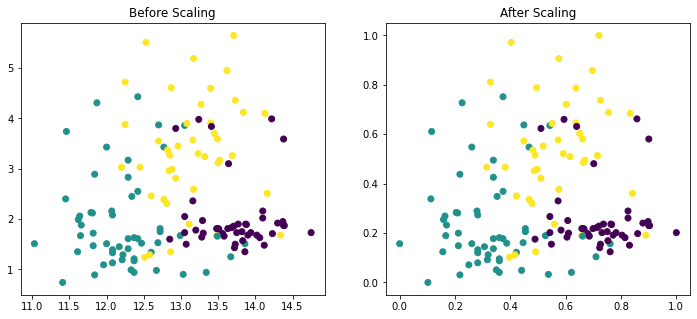

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic Acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic Acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

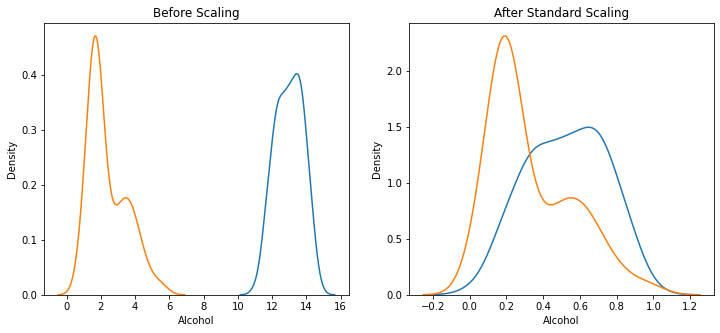

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic Acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic Acid'], ax=ax2)
plt.show()

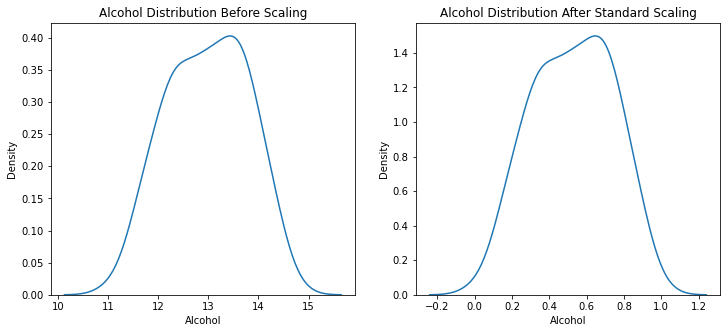

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

### Normalizer

l2 norm, l1 norm, max ( rescaled by the maximum of the absolute values. )

In [23]:
from sklearn.preprocessing import Normalizer

In [46]:
scaler = Normalizer()

scaler.fit(X_train)

X_train_scaled2 = scaler.transform(X_train)
X_test_scaled2 = scaler.transform(X_test)

In [43]:
X_train['Malic Acid']

161    3.26
92     1.53
94     1.99
174    3.91
24     1.81
       ... 
103    1.72
67     1.17
117    1.61
47     1.68
172    2.51
Name: Malic Acid, Length: 142, dtype: float64

In [47]:
X_test_scaled2

array([[0.9926945 , 0.12065501],
       [0.97889756, 0.20435156],
       [0.99585352, 0.09097126],
       [0.99195955, 0.12655531],
       [0.91381155, 0.40613847],
       [0.98463744, 0.17461131],
       [0.98850946, 0.15115899],
       [0.95519229, 0.29598596],
       [0.99017455, 0.1398369 ],
       [0.98871918, 0.14978113],
       [0.98213207, 0.18819297],
       [0.9399515 , 0.34130804],
       [0.99240636, 0.12300248],
       [0.99627977, 0.0861778 ],
       [0.9824271 , 0.18664668],
       [0.997074  , 0.07644234],
       [0.99387492, 0.1105108 ],
       [0.99378082, 0.11135388],
       [0.99426144, 0.1069775 ],
       [0.99295814, 0.11846572],
       [0.99704553, 0.07681281],
       [0.99210145, 0.12543811],
       [0.98139873, 0.19198057],
       [0.99057302, 0.13698572],
       [0.99604409, 0.08886038],
       [0.98168062, 0.19053386],
       [0.99250952, 0.1221673 ],
       [0.99134853, 0.13125585],
       [0.97500238, 0.22219442],
       [0.9805259 , 0.1963898 ],
       [0.

### MaxAbsScaler
Scale each feature by its maximum absolute value.

In [57]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

scaler.fit(X_train)

X_train_scaled2 = scaler.transform(X_train)
X_test_scaled2 = scaler.transform(X_test)

In [58]:
X_test_scaled2

array([[0.93152542, 0.29557522],
       [0.86711864, 0.47256637],
       [0.83864407, 0.2       ],
       [0.91932203, 0.30619469],
       [0.88474576, 1.02654867],
       [0.78372881, 0.36283186],
       [0.95322034, 0.38053097],
       [0.8379661 , 0.67787611],
       [0.83050847, 0.30619469],
       [0.81898305, 0.32389381],
       [0.90576271, 0.45309735],
       [0.94101695, 0.8920354 ],
       [0.96271186, 0.31150442],
       [0.83864407, 0.18938053],
       [0.92067797, 0.45663717],
       [0.81355932, 0.16283186],
       [0.93288136, 0.27079646],
       [0.9620339 , 0.28141593],
       [0.85694915, 0.24070796],
       [0.93762712, 0.2920354 ],
       [0.88881356, 0.17876106],
       [0.88474576, 0.2920354 ],
       [0.89762712, 0.45840708],
       [0.84813559, 0.30619469],
       [0.8359322 , 0.19469027],
       [0.84881356, 0.4300885 ],
       [0.84271186, 0.27079646],
       [0.82440678, 0.28495575],
       [0.79728814, 0.47433628],
       [0.93423729, 0.48849558],
       [0.

### Robust Scaling

Robust to outliers

In [59]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaler.fit(X_train)

X_train_scaled2 = scaler.transform(X_train)
X_test_scaled2 = scaler.transform(X_test)

In [60]:
X_test_scaled2

array([[ 0.54263566, -0.13888889],
       [-0.19379845,  0.47839506],
       [-0.51937984, -0.47222222],
       [ 0.40310078, -0.10185185],
       [ 0.00775194,  2.41049383],
       [-1.14728682,  0.09567901],
       [ 0.79069767,  0.15740741],
       [-0.52713178,  1.19444444],
       [-0.6124031 , -0.10185185],
       [-0.74418605, -0.04012346],
       [ 0.24806202,  0.41049383],
       [ 0.65116279,  1.94135802],
       [ 0.89922481, -0.08333333],
       [-0.51937984, -0.50925926],
       [ 0.41860465,  0.42283951],
       [-0.80620155, -0.60185185],
       [ 0.55813953, -0.22530864],
       [ 0.89147287, -0.1882716 ],
       [-0.31007752, -0.33024691],
       [ 0.6124031 , -0.15123457],
       [ 0.05426357, -0.5462963 ],
       [ 0.00775194, -0.15123457],
       [ 0.15503876,  0.42901235],
       [-0.41085271, -0.10185185],
       [-0.5503876 , -0.49074074],
       [-0.40310078,  0.33024691],
       [-0.47286822, -0.22530864],
       [-0.68217054, -0.17592593],
       [-0.99224806,

In [62]:
X_train_scaled2 = pd.DataFrame(X_train_scaled2,columns=X_train.columns)
X_test_scaled2 = pd.DataFrame(X_test_scaled2,columns=X_test.columns)

In [63]:
np.round(X_train_scaled2.describe(),1)

,Alcohol,Malic Acid
count,142.0,142.0
mean,-0.0,0.3
std,0.6,0.7
min,-1.6,-0.7
25%,-0.5,-0.2
50%,0.0,-0.0
75%,0.5,0.8
max,1.3,2.3


In [64]:
np.round(X_test_scaled2.describe(),1)

,Alcohol,Malic Acid
count,36.0,36.0
mean,0.0,0.2
std,0.7,0.7
min,-1.1,-0.6
25%,-0.5,-0.2
50%,0.0,-0.1
75%,0.6,0.4
max,1.4,2.4
